<a href="https://colab.research.google.com/github/BiancadeFrancisco/Clusterizacao_Hierarquica/blob/main/CLUSTERIZA%C3%87%C3%83O_HIER%C3%81RQUICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [ ]:
# Simulate clusters

X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0) # 80 observações, 2 caracteristicas, 4 grupos, 6 desvios padrão
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [ ]:
# AGLOMERAÇÃO HIERÁRQUICA COM BIBLIOTECA SKLEARN

AgglomerativeClustering?

model = AgglomerativeClustering(n_clusters = 4)
labels = model.fit_predict(X)


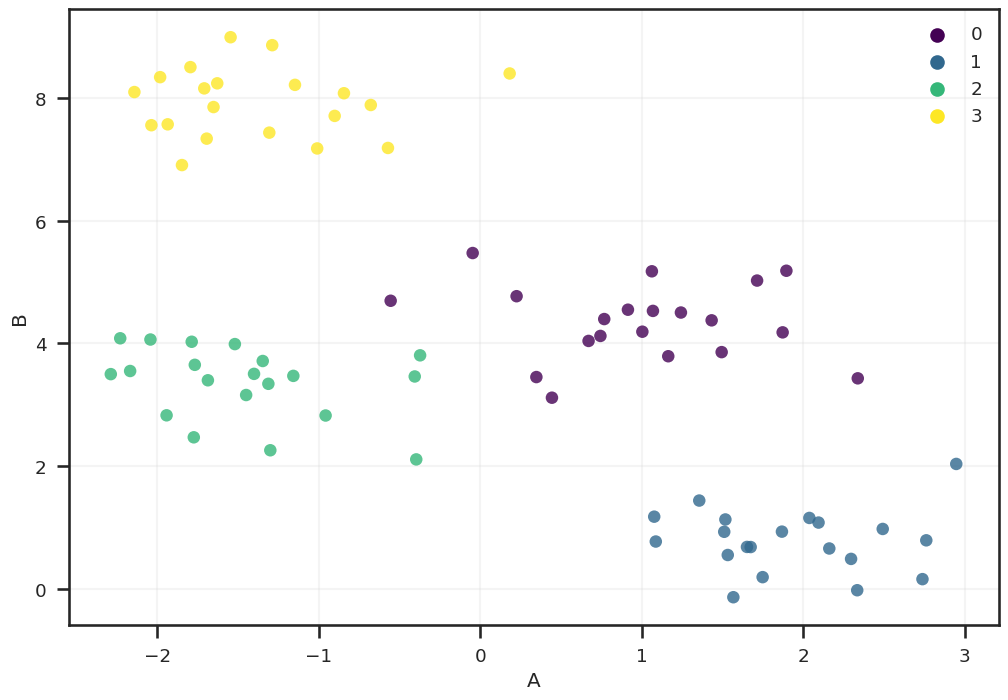

In [ ]:
# DADOS ORIGINAIS

sns.scatterplot(data=df, x = "A", y= "B", hue = y, **scatter_kwargs);

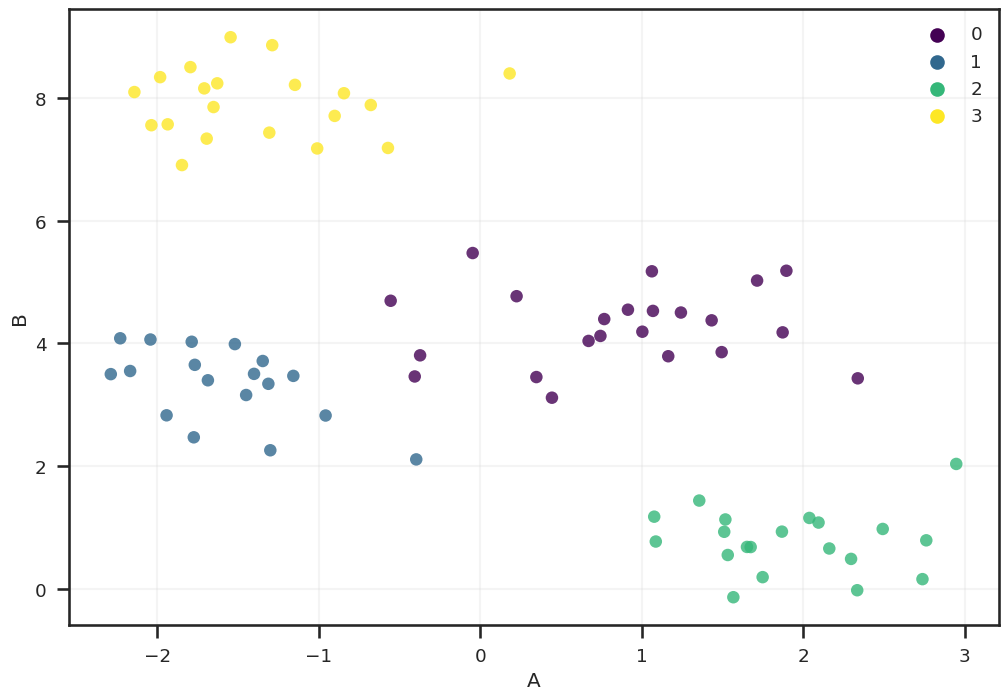

In [ ]:
# APÓS CLUSTERIZAÇÃO

sns.scatterplot(data=df, x = "A", y= "B", hue = labels, **scatter_kwargs);

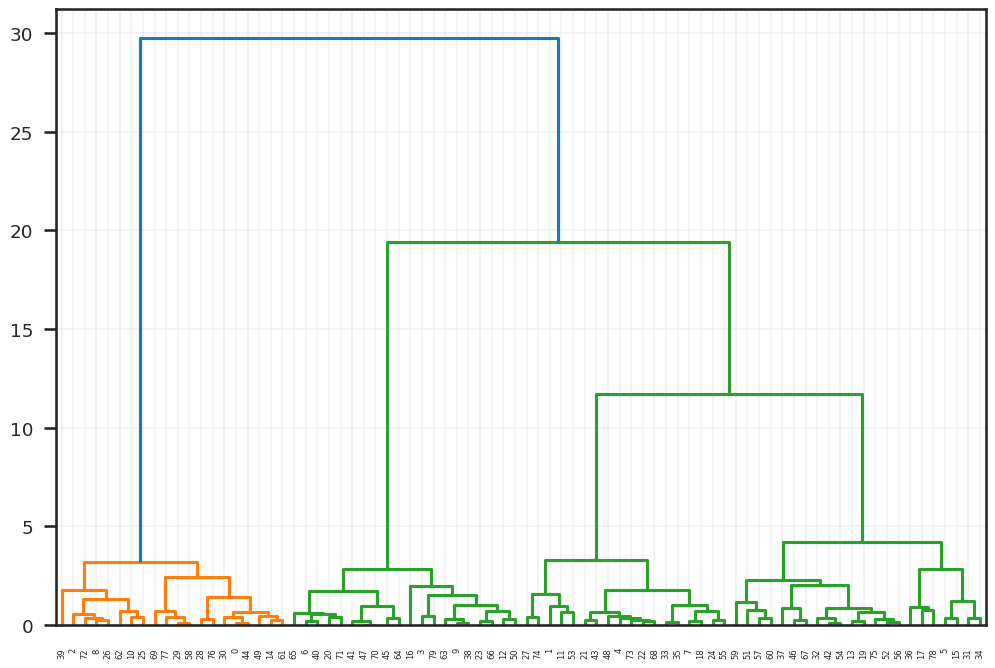

In [ ]:
# CLUSTERIZAÇÃO HIERÁRQUICA COM SCIPY

Z = linkage(df, method="ward") # MATRIZ Z
dendrogram_dict = dendrogram(Z)
plt.show()

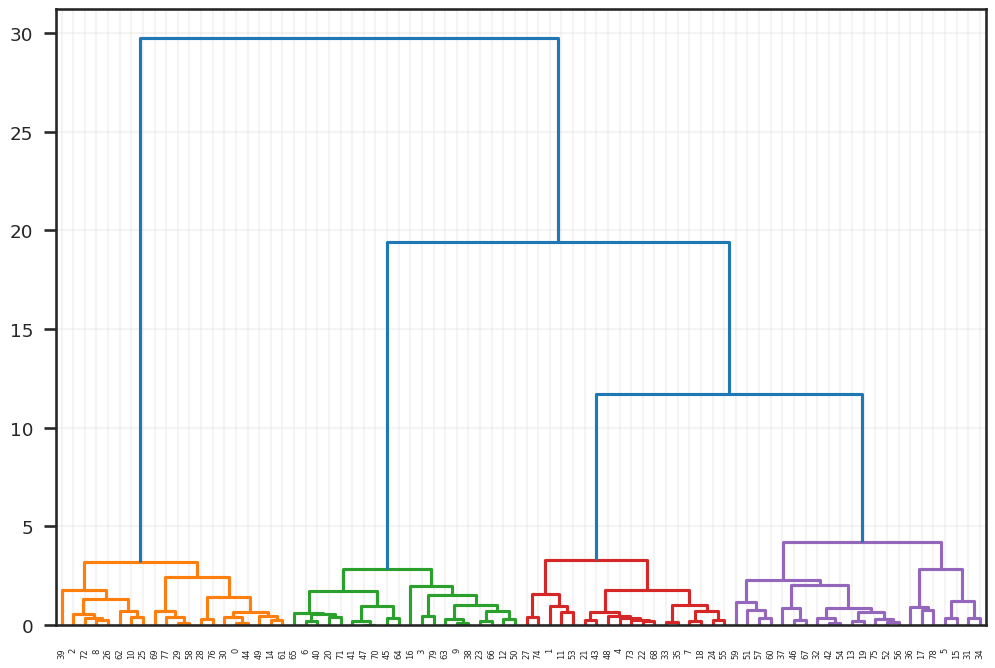

In [ ]:
# CLUSTERIZAÇÃO HIERÁRQUICA COM SCIPY

Z = linkage(df, method="ward") # MATRIZ Z
dendrogram_dict = dendrogram(Z, color_threshold=10) #alterando o ponto de corte para 10
plt.show()

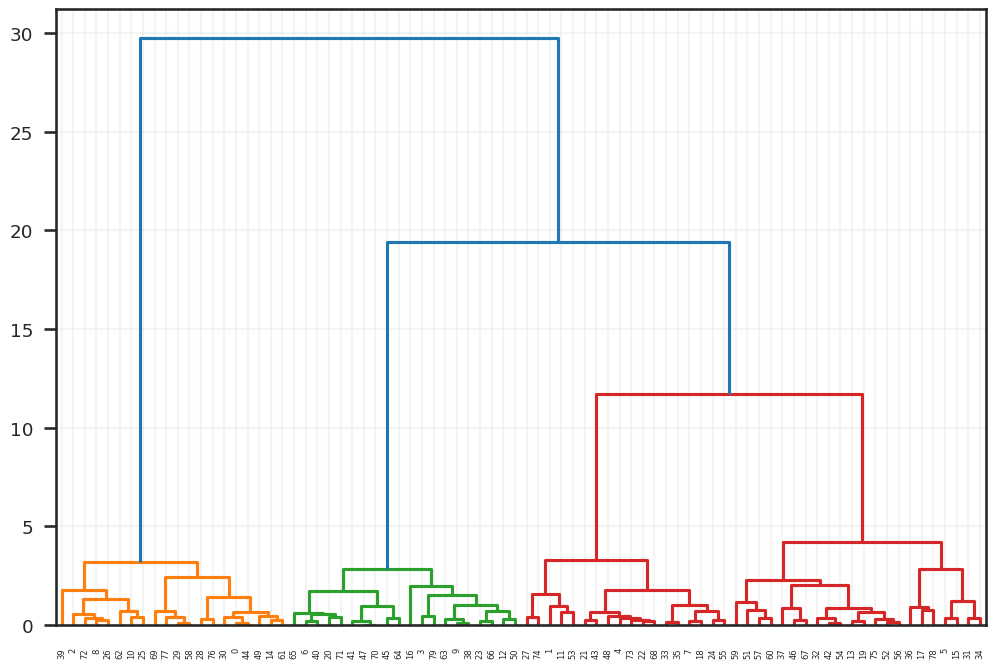

In [ ]:
# CLUSTERIZAÇÃO HIERÁRQUICA COM SCIPY

Z = linkage(df, method="ward") # MATRIZ Z
dendrogram_dict = dendrogram(Z, color_threshold=15) #alterando o ponto de corte para 15
plt.show()

In [ ]:
# FILTRANDO E DEFININDO O NUMERO DE GRUPOS QUE QUERO DISTRIBUIR:

fcluster(Z, 4, criterion = "maxclust")



array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [ ]:
@interact(method=["single", "complete", "centroide", "ward"])
def plot_dendrogram(method):
  Z = linkage(df, method = method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroide', 'ward'), valu…